# TP n°2 on FILTER BANKS
#### Jeanne Malécot - Clément Dardare 
---
---

### Imports

In [29]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import scipy.signal

---
## Part 1 : Two-channek filter bank
---
---



### Question 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


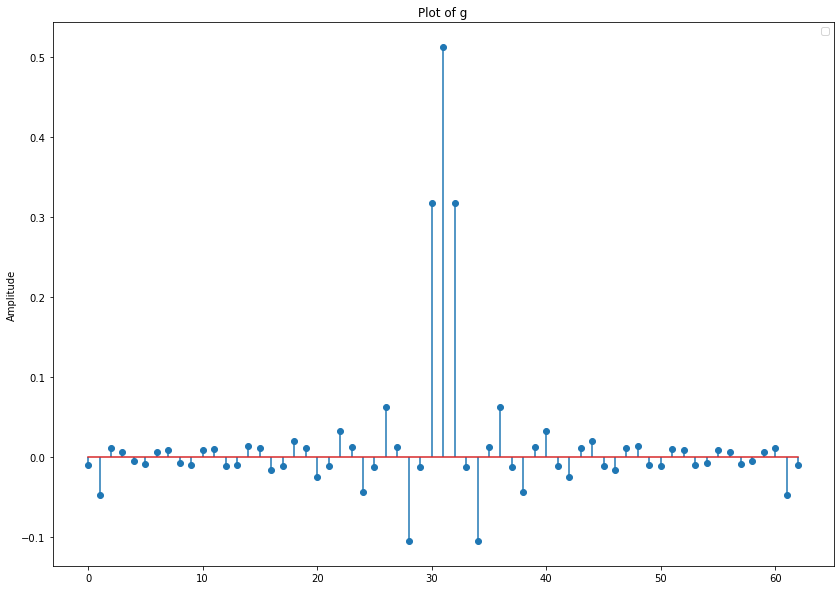

In [30]:
#filter params definition
N=32
nu_c = 1/4
e = 1/80

#filter
g = scipy.signal.remez(2*N-1, [0,nu_c, nu_c+e, 1/2], [1,0])


plt.figure(figsize=(14,10))
plt.title("Plot of g")
plt.stem(g)
plt.ylabel("Amplitude")
plt.legend()
plt.show()

> We can see that the _half-band_ condition does not hold : one of two coefficient are clearly not zero.

### Question 2

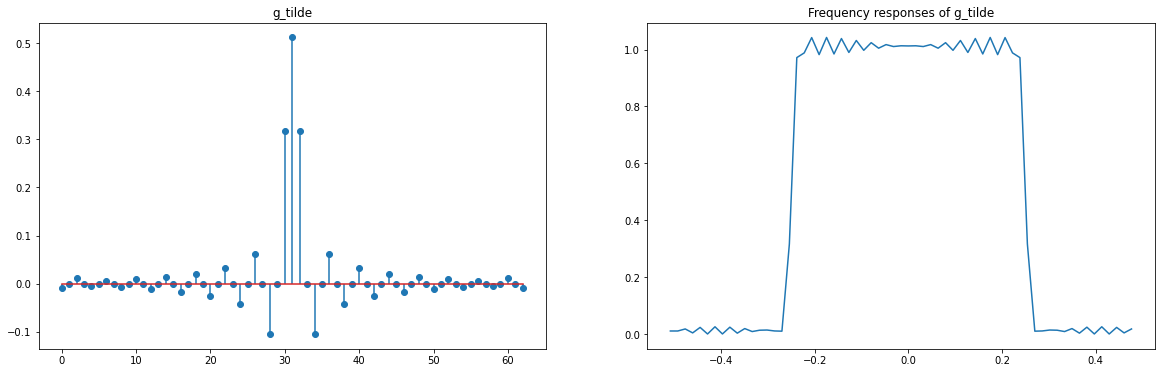

In [31]:
g_tild = scipy.signal.remez(2*N-1, [0,nu_c, nu_c+e, 1/2], [1,0]) #copie de g
l_g = len(g_tild)

for i in range (l_g) :
    if i % 2 != 0 and i != l_g //2 :
        g_tild[i] = 0


#plot
filter = np.abs(np.fft.fft(g_tild))
f_size = filter.shape[0]

filter = np.concatenate((filter[f_size//2 :], filter[:f_size//2]))
abs = np.arange(-f_size//2, f_size//2)/f_size

fig = plt.figure(figsize=(20,6))
fig.add_subplot(121).set_title('g_tilde')
plt.stem(g_tild)

fig.add_subplot(122).set_title('Frequency responses of g_tilde')
plt.plot(abs, filter)

plt.show()

> We can see that *g_tild* does not respect the Chebyshev alternance property.

### Question 3

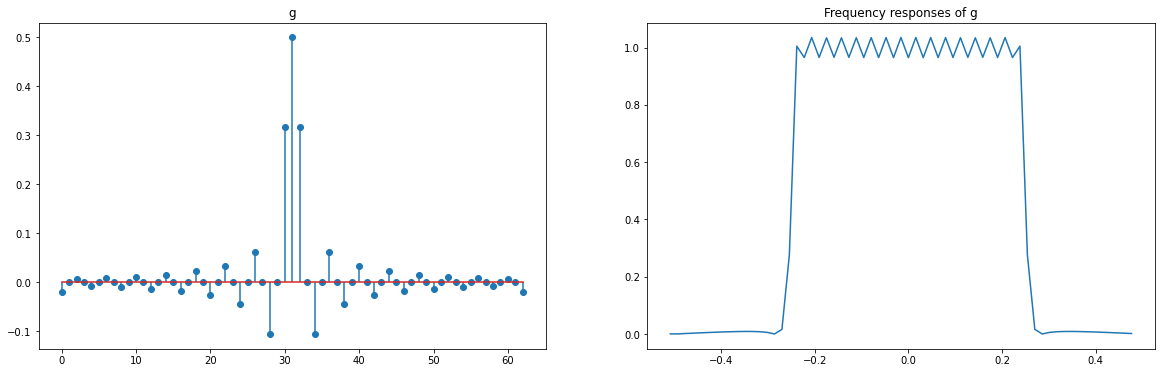

In [32]:
#new filter params definition
N=32
nu_c = 0.48
e = 0.02

#nearly all-pass filter
v = scipy.signal.remez(N, [0,nu_c, nu_c+e, 1/2], [1,0])

#building of the low-pass filter g 
c = 0.5
dirac = np.array([0]*(N-1) + [1] + [0]*(N-1))
v_2 = np.insert(v, range(1,len(v)), 0)  #v 2-upsampled

g = np.add(c*dirac, c*v_2)

#plot
filter = np.abs(np.fft.fft(g))
f_size = filter.shape[0]

filter = np.concatenate((filter[f_size//2 :], filter[:f_size//2]))
abs = np.arange(-f_size//2, f_size//2)/f_size

fig = plt.figure(figsize=(20,6))
fig.add_subplot(121).set_title('g')
plt.stem(g)

fig.add_subplot(122).set_title('Frequency responses of g')
plt.plot(abs, filter)

plt.show()

---
### Question 4

c:\Users\jeann\anaconda3\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\Users\jeann\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\jeann\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\jeann\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


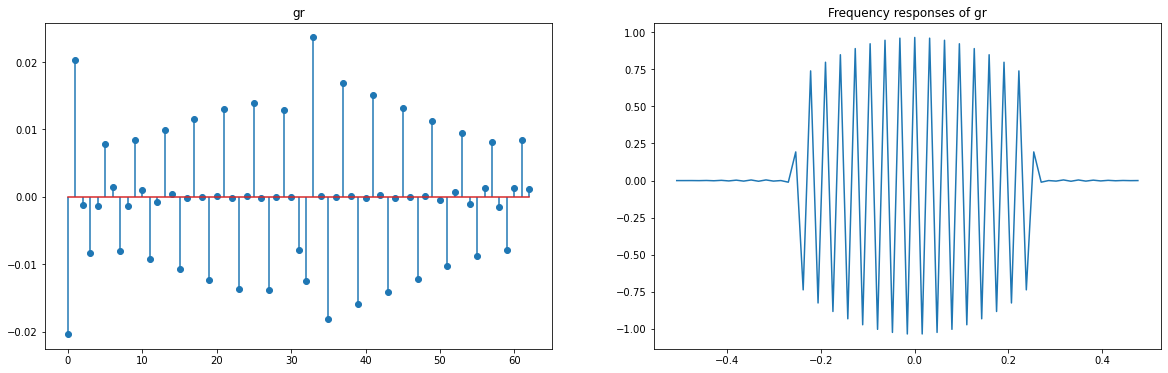

In [34]:
Gr_freq = [filter[k]*np.exp(2j*np.pi*abs[k]*(N-1)) for k in range (len(abs))]
gr = np.fft.ifft(Gr_freq)

#plot
fig = plt.figure(figsize=(20,6))
fig.add_subplot(121).set_title('gr')
plt.stem(gr)

fig.add_subplot(122).set_title('Frequency responses of gr')
plt.plot(abs, Gr_freq)

plt.show()

$G_R(\nu$) is clearly not nonnegative at all frequencies.  
Thus, we can not factorize $G_R(\nu$)  in the form $\tilde{H}_0(e^{2i\pi\nu})H_0(e^{2i\pi\nu})$ because this product is always positive.

### Question 5

c:\Users\jeann\anaconda3\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\Users\jeann\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\jeann\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


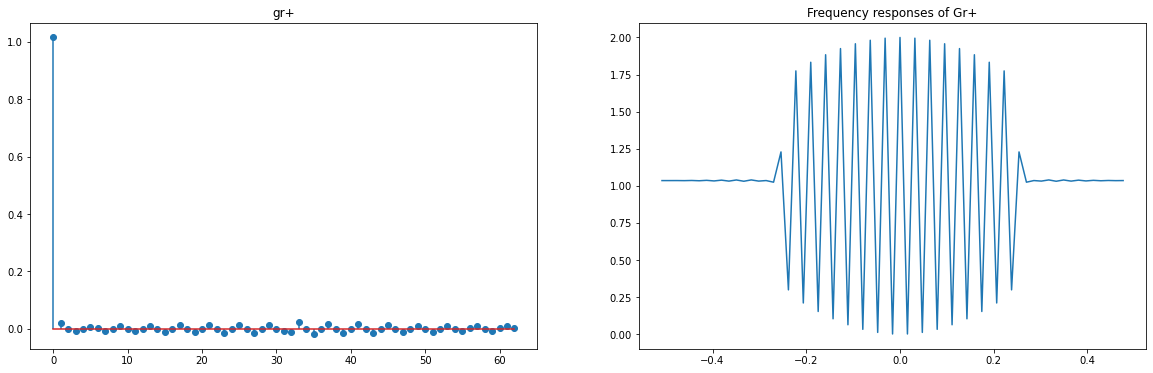

In [43]:
delta = max(np.abs(Gr_freq))

Gr_plus = Gr_freq + delta
gr_plus = np.fft.ifft(Gr_plus)

#plot
fig = plt.figure(figsize=(20,6))
fig.add_subplot(121).set_title('gr+')
plt.stem(gr_plus)

fig.add_subplot(122).set_title('Frequency responses of Gr+')
plt.plot(abs, Gr_plus)

plt.show()


### Question 6

In [74]:
#Initialization
h_0 = np.array([1]+(N-1)*[0])
first_column = np.array((N-1)*[0] + [1])
A = scipy.linalg.hankel(first_column, h_0)
gr_plus_N = gr_plus[:N]

error = scipy.linalg.norm(A.dot(h_0) - gr_plus_N)
print(error)
#Iterations until obtain an acceptable error
while error > 0.01:
    h_0 = (scipy.linalg.inv(A)).dot(gr_plus_N)
    h_0 *= np.sqrt(gr_plus_N[N-1])/scipy.linalg.norm(h_0) #Normalize h_0
    first_column = np.array((N-1)*[0] + [h_0[0]])
    A = scipy.linalg.hankel(first_column, h_0)
    error = scipy.linalg.norm(A.dot(h_0) - gr_plus_N)
    print(error)

print(h_0)

1.4718556491271995
1.1172487645991869
1.1236314201676159
1.1756840383277316
1.1274945252567672
1.2044419630350893
1.1314971361397277
1.2165416421142041
1.1351634879189458
1.2221357633176597
1.1378775931155185
1.2241581497057625
1.1397293178810006
1.2252854005906295
1.140963450525693
1.2255479311003452
1.141744178102247
1.2258092166335364
1.1422377629990592
1.2257911956623164
1.142538610715825
1.2258699328907243
1.1427208279919203
1.2258280320695496
1.1428303046917079
1.225861922363561
1.1428935461536258
1.225832295281593
1.1429321178819727
1.2258511740452007
1.142952786312531
1.2258331616723606
1.14296629964842
1.2258448048173052
1.1429725046918742
1.2258341302018088
1.142977390584366
1.225841482063353
1.1429789346446868
1.2258351059689818
1.142980857271961
1.2258397520717221
1.1429810122391575
1.2258358851415647
1.1429818827460603
1.225838814512455
1.1429816908104342
1.2258364358324656
1.1429821538209
1.2258382814567654
1.1429819237364252
1.2258368017744574
1.142982204180584
1.2258379

KeyboardInterrupt: 

Infinite loop ?

---
### Question 7

In [86]:
h_1= np.array([(-1)**k * h_0[N-1-k] for k in range (N)])
f_0 = np.array([h_0[N-1-k] for k in range (N)])
f_1 = np.array([h_1[N-1-k] for k in range (N)])

---
## Part 2 : Transmultiplexer
---
---


In [93]:
import wave
import struct
import pyaudio

### Question 1

In [96]:
def upsampling(x, L):
    xSize = x.shape[0]
    newSize = int(xSize * L)
    XUpsampled = np.zeros(newSize)
    XUpsampled[np.arange(xSize)*L] = x

    return XUpsampled

def downsampling(x, M):
    return [x[M*i] for i in range(x.shape[0]//M)]

In [97]:
L = 2
M = 2

c = np.array([1] + [0]*(N-1))

s0 = wave.open("homme3.wav", 'rb')
s1 = wave.open("femme3.wav", 'rb')

num_samples = int(s0.getnframes())
data = s0.readframes(num_samples)
data = struct.unpack('{n}h'.format(n=num_samples), data)
s0= np.array(data)

num_samples = int(s1.getnframes())
data = s1.readframes(num_samples)
data = struct.unpack('{n}h'.format(n=num_samples), data)
s1= np.array(data)

s0_up = upsampling(s0, L)
s1_up = upsampling(s1, L)

x0 = np.convolve(f_0, s0_up)
x1 = np.convolve(f_1, s1_up)

x_tild = x0 + x1

x = np.convolve(x_tild, c)

### Question 2

In [98]:
s0_hat = np.convolve(h_0, x)
s1_hat = np.convolve(h_1, x)

s0_reco = downsampling(s0_hat, M)
s1_reco = downsampling(s1_hat, M)